# pyFiDEL 

This is simple tutorial to demonstrate the usage of pyFiDEL package

In [1]:
from pyFiDEL import SimClassifier
from pyFiDEL.ranks import build_metric
from pyFiDEL.ranks import get_fermi_min, get_fermi_root, build_correspond_table

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create simulator

c = SimClassifier(N = 1000, rho = 0.7)

In [3]:
# generate Gaussian score with target AUC

score = c.create_gaussian_scores(auc0 = .7)

Final AUC: 0.6999 (iter: 261) mu2: 0.7416143171871158


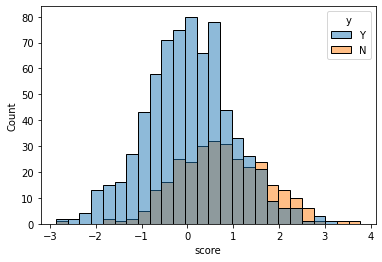

In [4]:
# show score histogram

c.plot_score()

In [5]:
df, info = build_metric(c.score, c.y)
df

,score,y,rank,tpr,fpr,bac,prec
0,-2.865140,Y,1,0.001429,0.000000,0.500714,1.000000
1,-2.655607,Y,2,0.002857,0.000000,0.501429,1.000000
2,-2.645042,N,3,0.002857,0.003333,0.499762,0.666667
3,-2.464232,Y,4,0.004286,0.003333,0.500476,0.750000
4,-2.389570,Y,5,0.005714,0.003333,0.501190,0.800000
...,...,...,...,...,...,...,...
995,2.843025,Y,996,0.998571,0.990000,0.504286,0.701807
996,2.976237,N,997,0.998571,0.993333,0.502619,0.701103
997,3.249203,Y,998,1.000000,0.993333,0.503333,0.701403
998,3.398030,N,999,1.000000,0.996667,0.501667,0.700701


In [6]:
info

{'auc_rank': 0.7000190476190477,
 'auc_bac': 0.7000190476190475,
 'auprc': 0.8318624253282337,
 'rho': 0.7,
 'beta': 2.6067801232896244,
 'mu': 0.867135668353576,
 'r_star': 0.5420994856632015}

<AxesSubplot:xlabel='fpr', ylabel='tpr'>

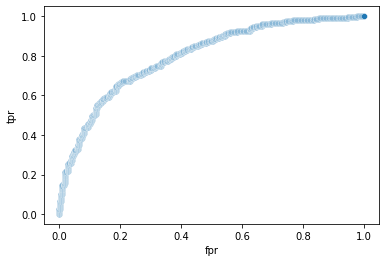

In [8]:
sns.scatterplot(data=df, x='fpr', y='tpr')

(0.0, 1.0)

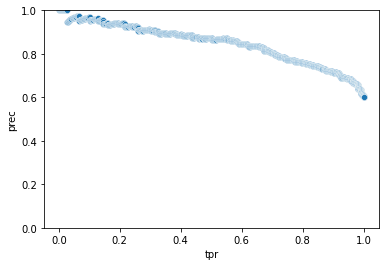

In [10]:
g = sns.scatterplot(data=df, x='tpr', y='prec')
g.set_ylim(0, 1)

(0.4, 1.0)

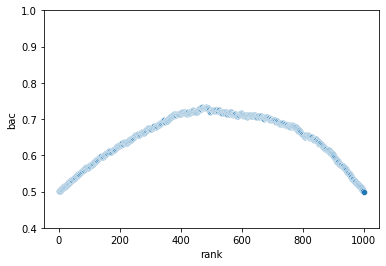

In [15]:
g = sns.scatterplot(data=df, x='rank', y='bac')
g.set_ylim(.4, 1)

In [2]:
auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_fermi_min(auc, 0.5, resol=0.00001), ignore_index=True)
    
ans

,beta,mu,r_star
0,1.221102,0.499974,0.499974
1,2.611782,0.500194,0.500194
2,4.394542,0.500000,0.500000
3,7.560140,0.500002,0.500002


In [9]:
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_fermi_root(auc, 0.5), ignore_index=True)
    
ans

0.6 0.5 0.5 - 0.24895836588351422 0.225
0.6 0.5 0.5 - 0.23202050170031643 0.225


ValueError: f(a) and f(b) must have different signs

In [3]:
auclist = [0.51, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
rholist = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

df = build_correspond_table(auclist, rholist, resol=0.00001)
df

,auc,rho,beta,mu,r_star
0,0.51,0.1,0.589124,-3.223147,0.506499
1,0.51,0.2,0.122052,-10.860537,0.497713
2,0.51,0.3,0.140624,-5.522455,0.502818
3,0.51,0.4,0.121428,-2.839471,0.499676
4,0.51,0.5,0.016504,0.200998,0.200998
5,0.51,0.6,-0.004456,-89.560957,1.424945
6,0.51,0.7,-0.003780,-222.578695,1.594376
7,0.51,0.8,-0.008158,-168.900079,1.035212
8,0.51,0.9,0.421432,5.752064,0.538358
9,0.60,0.1,1.238624,-1.314490,0.459433


<AxesSubplot:xlabel='auc', ylabel='beta'>

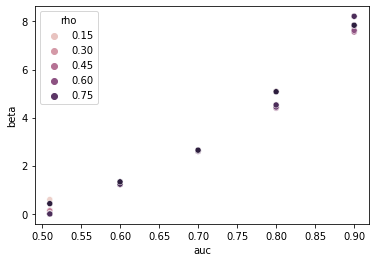

In [4]:
sns.scatterplot(data=df, x='auc', y='beta', hue='rho')

<AxesSubplot:xlabel='auc', ylabel='mu'>

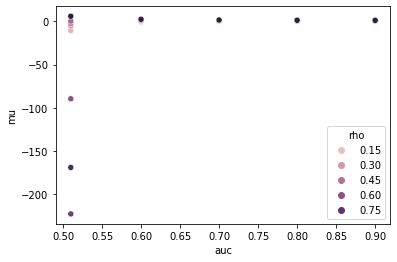

In [5]:
sns.scatterplot(data=df, x='auc', y='mu', hue='rho')

<AxesSubplot:xlabel='rho', ylabel='beta'>

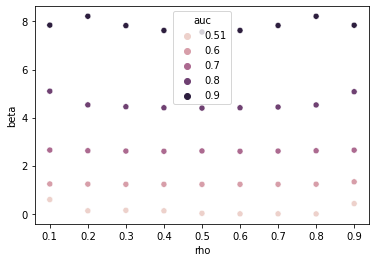

In [6]:
sns.scatterplot(data=df, x='rho', y='beta', hue='auc')

<AxesSubplot:xlabel='rho', ylabel='mu'>

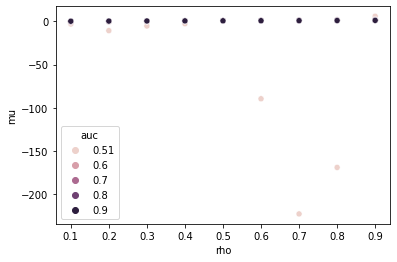

In [7]:
sns.scatterplot(data=df, x='rho', y='mu', hue='auc')

In [10]:
import numpy as np

resol = 1E-6
np.linspace?

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals